In [ ]:
# NumPy is used to perform mathematical operations on arrays.
import numpy as np
# matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB like creates a figure, creates a plotting area in a figure etc.
import matplotlib.pyplot as plt
# Pandas is mainly used for data analysis. It helps in importing data from various file types such as csv, Json, Microsoft excel, etc. 
import pandas as pd
# extends the list of mathematical functions.
import math
from sklearn.linear_model import LogisticRegression
from math import exp
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Education_data_ML_34.csv')

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.shape

(480, 17)

In [ ]:
# Only selecting columns based on Pyschology
cols = ['raisedhands',	'VisITedResources',	'AnnouncementsView',	'Discussion', 'Class']
df = df[cols]
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [ ]:
num_neighbors = 5

In [ ]:
trainingclass=df.values[0:480,-1]
trainingclass

array(['M', 'M', 'L', 'L', 'M', 'M', 'L', 'M', 'M', 'M', 'H', 'M', 'L',
       'L', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'L', 'L', 'L',
       'M', 'L', 'M', 'M', 'H', 'L', 'L', 'L', 'L', 'L', 'L', 'M', 'L',
       'M', 'L', 'M', 'L', 'M', 'M', 'L', 'L', 'H', 'H', 'M', 'L', 'L',
       'M', 'H', 'L', 'L', 'L', 'L', 'M', 'M', 'L', 'M', 'H', 'M', 'L',
       'L', 'M', 'H', 'H', 'M', 'L', 'M', 'L', 'M', 'L', 'M', 'M', 'M',
       'L', 'H', 'L', 'L', 'L', 'M', 'H', 'L', 'H', 'L', 'L', 'L', 'L',
       'H', 'H', 'H', 'L', 'H', 'H', 'M', 'M', 'M', 'M', 'H', 'L', 'L',
       'M', 'L', 'M', 'H', 'M', 'M', 'H', 'M', 'L', 'L', 'L', 'L', 'M',
       'H', 'M', 'M', 'M', 'L', 'M', 'M', 'L', 'L', 'M', 'L', 'L', 'L',
       'L', 'M', 'L', 'L', 'H', 'H', 'H', 'M', 'H', 'M', 'L', 'L', 'M',
       'H', 'L', 'M', 'H', 'M', 'M', 'H', 'H', 'M', 'H', 'L', 'M', 'H',
       'M', 'M', 'L', 'M', 'H', 'M', 'H', 'M', 'M', 'H', 'M', 'H', 'H',
       'M', 'H', 'M', 'L', 'L', 'M', 'L', 'H', 'M', 'H', 'M', 'H

In [ ]:
unique_list=[]
for y in trainingclass:
  if y not in unique_list:
    unique_list.append(y)

print(unique_list)
for i in range(len(trainingclass)):
  for k in range(len(unique_list)):
    if(trainingclass[i]==unique_list[k]):
      trainingclass[i]=k
print(trainingclass)

['M', 'L', 'H']
[0 0 1 1 0 0 1 0 0 0 2 0 1 1 2 0 0 0 0 2 0 0 0 1 1 1 0 1 0 0 2 1 1 1 1 1 1
 0 1 0 1 0 1 0 0 1 1 2 2 0 1 1 0 2 1 1 1 1 0 0 1 0 2 0 1 1 0 2 2 0 1 0 1 0
 1 0 0 0 1 2 1 1 1 0 2 1 2 1 1 1 1 2 2 2 1 2 2 0 0 0 0 2 1 1 0 1 0 2 0 0 2
 0 1 1 1 1 0 2 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 2 2 2 0 2 0 1 1 0 2 1 0 2 0
 0 2 2 0 2 1 0 2 0 0 1 0 2 0 2 0 0 2 0 2 2 0 2 0 1 1 0 1 2 0 2 0 2 1 2 0 1
 2 0 0 2 0 1 1 0 0 0 0 2 2 1 0 2 2 0 0 1 2 0 0 0 0 2 0 2 1 1 1 0 0 2 0 0 0
 0 2 2 0 1 1 2 1 0 1 0 0 0 1 1 0 0 2 2 0 1 0 2 0 2 0 1 0 2 1 0 1 2 2 2 0 0
 1 1 0 0 0 0 2 0 0 0 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 2 2 0 0 1 1 2 2 0 0
 2 2 0 0 1 1 0 0 0 0 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 0 1 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 0 0 2 2 0 0 2 2 0 0 2 2 2 2 0 0 2 2
 0 0 1 1 1 1 0 0 1 1 1 1 2 2 2 2 0 0 1 1 0 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2 1
 1 0 0 2 2 0 0 1 1 2 2 2 2 2 2 0 0 2 2 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 1 1 0 0 0 0 1 1 0 0 1 1]


In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
cols = ['raisedhands',	'VisITedResources',	'AnnouncementsView',	'Discussion', 'Class']
df = df[cols]
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [ ]:
X=df.iloc[:,:-1].values

In [ ]:
X, len(X)

(array([[15, 16,  2, 20],
        [20, 20,  3, 25],
        [10,  7,  0, 30],
        ...,
        [55, 74, 25, 29],
        [30, 17, 14, 57],
        [35, 14, 23, 62]]), 480)

In [ ]:
trainingclass, len(trainingclass)

(array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1,
        0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1,
        1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0,
        2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1,
        0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1,
        2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2,
        1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0,
        0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
        1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
        2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 

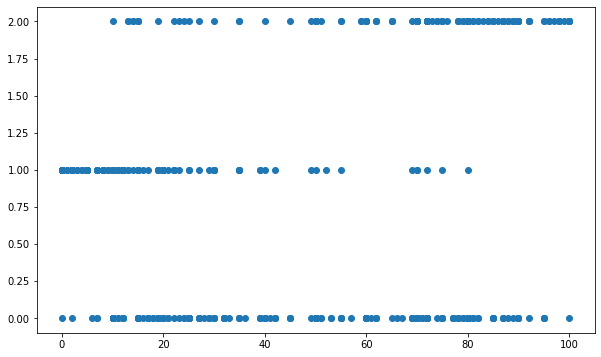

In [ ]:
plt.scatter(df['raisedhands'], trainingclass)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['raisedhands'], trainingclass, test_size=0.20)

In [ ]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + np.exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

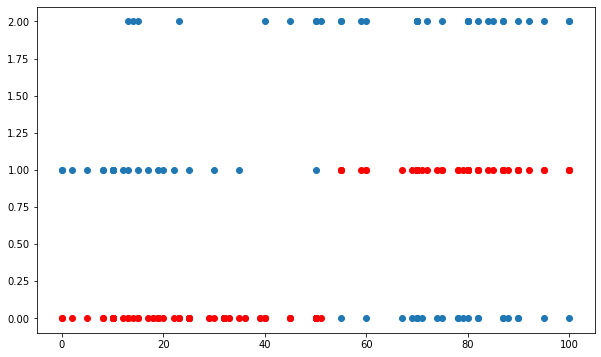

AttributeError: ignored

In [ ]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print("Accuracy = {accuracy / len(y_pred)}")